In [292]:
# CARGAMOS LIBRERIAS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import datetime

import boto3
# import s3fs
# import fastparquet
# import awswrangler as wr
import os

# import pyarrow.parquet as pq
# import pyarrow as pa

import requests
import json
from io import BytesIO
from pandas.tseries.offsets import BDay

import math

In [332]:
returns = pd.read_csv('ibex_historical_returns.csv',index_col='date')
returns.index = pd.to_datetime(returns.index)
returns.head()

,A3TV,ABE,ABG.P_1,ABG,ACS,ACX_1,ACX_2,AENA,AGS,ALB_2,...,TL5,TRE,TUB,UNF,VIS,VIS_1,VIS_2,VIS_3,ZEL,benchmark
date,,,,,,,,,,,,,,,,,,,,,
1993-08-11,NaN,NaN,NaN,NaN,NaN,0.038238,NaN,NaN,NaN,-0.001007,...,NaN,NaN,NaN,NaN,0.005841,NaN,NaN,NaN,NaN,0.009776
1993-08-12,NaN,NaN,NaN,NaN,NaN,0.039881,NaN,NaN,NaN,0.024588,...,NaN,NaN,NaN,NaN,0.022995,NaN,NaN,NaN,NaN,0.017845
1993-08-13,NaN,NaN,NaN,NaN,NaN,0.017449,NaN,NaN,NaN,0.030090,...,NaN,NaN,NaN,NaN,0.002876,NaN,NaN,NaN,NaN,0.008291
1993-08-16,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,-0.001881,...,NaN,NaN,NaN,NaN,0.002733,NaN,NaN,NaN,NaN,0.000385
1993-08-17,NaN,NaN,NaN,NaN,NaN,0.000831,NaN,NaN,NaN,0.023395,...,NaN,NaN,NaN,NaN,0.025183,NaN,NaN,NaN,NaN,0.016909


In [333]:
t_bill_files = [filename for filename in os.listdir('./Datos TFM') if filename.startswith("United States 3-Month Bond Yield")]
t_bill_data = pd.DataFrame()
for f in t_bill_files:
    file_path = './Datos TFM/'+f
    file = pd.read_csv(file_path)
    t_bill_data = pd.concat([t_bill_data,file],axis=0)
t_bill_data.index = pd.to_datetime(t_bill_data.Date)
t_bill_data.drop('Date',axis=1,inplace=True)
t_bill_data.head()

,Price,Open,High,Low,Change %
Date,,,,,
2023-07-25,5.436,5.432,5.439,5.426,0.34%
2023-07-24,5.418,5.453,5.486,5.418,-0.11%
2023-07-21,5.424,5.445,5.469,5.411,0.15%
2023-07-20,5.416,5.448,5.503,5.409,0.07%
2023-07-19,5.412,5.452,5.452,5.409,0.00%


In [334]:
def locate_in_df(df, value):
    a = df.to_numpy()
    row = np.where(a == value)[0][0]
    col = np.where(a == value)[1][0]
    return row, col
locate_in_df(sharpe_ratio,sharpe_ratio.min().min()),sharpe_ratio.min().min()

((3514, 35), -13.325416759985345)

In [335]:
(adjusted_period_returns_mean / adjusted_period_negative_returns_std)[DIAS:]

,A3TV,ABE,ABG.P_1,ABG,ACS,ACX_1,ACX_2,AENA,AGS,ALB_2,...,TEM,TL5,TRE,TUB,UNF,VIS,VIS_1,VIS_2,VIS_3,ZEL
date,,,,,,,,,,,,,,,,,,,,,
1993-12-20,-2.396984,-2.396984,-2.396984,-2.396984,-2.396984,NaN,-2.396984,-2.396984,-2.396984,NaN,...,-2.396984,-2.396984,-2.396984,-2.396984,-2.396984,NaN,-2.396984,-2.396984,-2.396984,-2.396984
1993-12-21,-2.420337,-2.420337,-2.420337,-2.420337,-2.420337,NaN,-2.420337,-2.420337,-2.420337,NaN,...,-2.420337,-2.420337,-2.420337,-2.420337,-2.420337,NaN,-2.420337,-2.420337,-2.420337,-2.420337
1993-12-22,-2.441737,-2.441737,-2.441737,-2.441737,-2.441737,NaN,-2.441737,-2.441737,-2.441737,NaN,...,-2.441737,-2.441737,-2.441737,-2.441737,-2.441737,NaN,-2.441737,-2.441737,-2.441737,-2.441737
1993-12-23,-2.630530,-2.630530,-2.630530,-2.630530,-2.630530,NaN,-2.630530,-2.630530,-2.630530,NaN,...,-2.630530,-2.630530,-2.630530,-2.630530,-2.630530,NaN,-2.630530,-2.630530,-2.630530,-2.630530
1993-12-27,-2.630692,-2.630692,-2.630692,-2.630692,-2.630692,NaN,-2.630692,-2.630692,-2.630692,NaN,...,-2.630692,-2.630692,-2.630692,-2.630692,-2.630692,NaN,-2.630692,-2.630692,-2.630692,-2.630692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-04,-3.032902,-3.032902,-3.032902,-3.032902,-4.439225,-3.032902,-3.601336,-4.213277,-3.032902,-3.032902,...,-3.032902,-3.032902,-3.032902,-3.032902,-3.032902,-3.032902,-3.032902,-3.032902,-3.032902,-3.032902
2023-08-07,-3.079093,-3.079093,-3.079093,-3.079093,-4.596245,-3.079093,-3.615628,-4.365863,-3.079093,-3.079093,...,-3.079093,-3.079093,-3.079093,-3.079093,-3.079093,-3.079093,-3.079093,-3.079093,-3.079093,-3.079093
2023-08-08,-3.122746,-3.122746,-3.122746,-3.122746,-4.686822,-3.122746,-3.670260,-4.427830,-3.122746,-3.122746,...,-3.122746,-3.122746,-3.122746,-3.122746,-3.122746,-3.122746,-3.122746,-3.122746,-3.122746,-3.122746


In [336]:
# DEFINIMOS UNA CANTIDAD DE DIAS PARA LA VENTANA DE CALCULO DE LOS RETORNOS
DIAS = 90
ACTIVOS = 10

returns_cleaned = returns.apply(lambda x: x.fillna(abs(x.min())*-2), axis=1)
# DEFINIMOS NUESTRA TASA LIBRE DE RIESGO A TRAVÉS DE LOS VALORES DE LA TASA T-BILLS DE 3 MESES
risk_free_rate = t_bill_data['Price']/100
risk_free_rate = risk_free_rate.sort_index()
returns_cleaned['risk_free_rate'] = risk_free_rate.loc[returns.index[0]:]
returns_cleaned['risk_free_rate'] = returns_cleaned['risk_free_rate'].fillna(method='ffill')
# AGREGAMOS LA OPCIÓN DE NO INVERTIR EN NINGUN ACTIVO COMO UNA COLUMNA CON RETORNO CERO
# returns['cash'] = 0

In [383]:
# CALCULAMOS LA SUMA DE RETORNOS CON ESA VENTANA DE DIAS DEFINIDA
adjusted_returns = (returns_cleaned.iloc[:,:-2].T - returns_cleaned['risk_free_rate']).T
adjusted_period_returns_mean = adjusted_returns.rolling(DIAS, min_periods=DIAS).mean()
adjusted_period_returns_std = adjusted_returns.rolling(DIAS, min_periods=DIAS).std()
downside_dev  = np.minimum(0, adjusted_returns)**2
downside_dev = np.sqrt(downside_dev.rolling(DIAS,min_periods=DIAS).mean())
benchmark_std = returns['benchmark'].rolling(DIAS,min_periods=DIAS).std()

market_stock_cov = returns_cleaned.iloc[:,:-2].rolling(DIAS, min_periods=DIAS).cov(returns_cleaned.iloc[:,-2])
market_variance = returns_cleaned.iloc[:,-2].rolling(DIAS, min_periods=DIAS).var()
beta = (market_stock_cov.T/market_variance).T
treynor_ratio = adjusted_period_returns_mean / beta

benchmark_adjusted_returns = (returns_cleaned.iloc[:,:-2].T - returns_cleaned['benchmark']).T
benchmark_adjusted_returns_mean = benchmark_adjusted_returns.rolling(DIAS, min_periods=DIAS).mean()
benchmark_adjusted_returns_std = benchmark_adjusted_returns.rolling(DIAS, min_periods=DIAS).std()

sharpe_ratio = adjusted_period_returns_mean / adjusted_period_returns_std
sortino_ratio =  adjusted_period_returns_mean / downside_dev
modigliani_measure = ((sharpe_ratio.T * benchmark_std) + returns_cleaned['risk_free_rate']).T
information_ratio = benchmark_adjusted_returns_mean / benchmark_adjusted_returns_std

In [384]:
ranking_sharpe = sharpe_ratio[DIAS:].rank(axis=1, numeric_only=True, method='max',ascending=False)
ranking_sortino = sortino_ratio[DIAS:].rank(axis=1, numeric_only=True, method='max',ascending=False)
ranking_modigliani = modigliani_measure[DIAS:].rank(axis=1, numeric_only=True, method='max',ascending=False)
ranking_treynor = treynor_ratio[DIAS:].rank(axis=1, numeric_only=True, method='max',ascending=False)
ranking_information = information_ratio[DIAS:].rank(axis=1, numeric_only=True, method='max',ascending=False)

In [385]:
ranking_concat = pd.concat([ranking_sharpe,ranking_sortino,ranking_modigliani,ranking_treynor, ranking_information])
ranking_concat = ranking_concat.groupby(ranking_concat.index).mean()
ranking_concat

,A3TV,ABE,ABG.P_1,ABG,ACS,ACX_1,ACX_2,AENA,AGS,ALB_2,...,TEM,TL5,TRE,TUB,UNF,VIS,VIS_1,VIS_2,VIS_3,ZEL
date,,,,,,,,,,,,,,,,,,,,,
1993-12-20,92.8,92.8,92.8,92.8,92.8,25.8,92.8,92.8,92.8,23.4,...,92.8,92.8,92.8,92.8,92.8,2.8,92.8,92.8,92.8,92.8
1993-12-21,93.2,93.2,93.2,93.2,93.2,25.8,93.2,93.2,93.2,24.6,...,93.2,93.2,93.2,93.2,93.2,3.2,93.2,93.2,93.2,93.2
1993-12-22,93.4,93.4,93.4,93.4,93.4,25.8,93.4,93.4,93.4,24.8,...,93.4,93.4,93.4,93.4,93.4,3.2,93.4,93.4,93.4,93.4
1993-12-23,93.4,93.4,93.4,93.4,93.4,25.8,93.4,93.4,93.4,22.8,...,93.4,93.4,93.4,93.4,93.4,3.4,93.4,93.4,93.4,93.4
1993-12-27,93.4,93.4,93.4,93.4,93.4,23.6,93.4,93.4,93.4,22.6,...,93.4,93.4,93.4,93.4,93.4,3.2,93.4,93.4,93.4,93.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-04,54.8,60.2,54.4,32.4,71.4,48.2,68.6,71.2,51.6,53.6,...,60.8,52.6,42.0,53.6,57.6,53.6,58.8,51.0,43.2,64.4
2023-08-07,46.0,52.0,46.6,32.0,72.8,48.4,67.6,71.8,43.8,54.0,...,63.4,46.8,36.0,54.0,49.0,54.0,59.2,43.2,42.8,64.6
2023-08-08,54.0,59.6,53.4,24.4,72.0,41.8,67.0,71.6,50.8,46.6,...,56.8,44.8,34.2,46.6,57.0,46.6,52.2,50.0,36.0,58.0


In [ ]:
ranking = (ranking - ranking.max())/(ranking.max() - ranking.min()) - 0.5

In [386]:
# ranking = sharpe_ratio.loc[sharpe_ratio.index[DIAS:]].rank(axis=1, numeric_only=True, method='max',ascending=False)
# ranking = (sharpe_ratio.loc[sharpe_ratio.index[10:-4]] - sharpe_ratio.loc[sharpe_ratio.index[10:-4]].mean())/sharpe_ratio.loc[sharpe_ratio.index[10:-4]].std()
# ranking = sharpe_ratio.loc[sharpe_ratio.index[DIAS:]]#.fillna(sharpe_ratio.min().min())
# ranking = ((ranking - ranking.mean()) / ranking.std())
ranking = (ranking_concat - ranking_concat.max())/(ranking_concat.max() - ranking_concat.min()) - 0.5
# ranking = ranking.fillna(-1)
ranking

,A3TV,ABE,ABG.P_1,ABG,ACS,ACX_1,ACX_2,AENA,AGS,ALB_2,...,TEM,TL5,TRE,TUB,UNF,VIS,VIS_1,VIS_2,VIS_3,ZEL
date,,,,,,,,,,,,,,,,,,,,,
1993-12-20,-0.510776,-0.510846,-0.513072,-0.510917,-0.510776,-1.199758,-0.510870,-0.510870,-0.511933,-1.260532,...,-0.511261,-0.510776,-0.510776,-0.510893,-0.513129,-1.477612,-0.510893,-0.510823,-0.510776,-0.510917
1993-12-21,-0.506466,-0.506508,-0.508715,-0.506550,-0.506466,-1.199758,-0.506522,-0.506522,-0.507160,-1.247228,...,-0.506757,-0.506466,-0.506466,-0.506536,-0.508753,-1.472637,-0.506536,-0.506494,-0.506466,-0.506550
1993-12-22,-0.504310,-0.504338,-0.506536,-0.504367,-0.504310,-1.199758,-0.504348,-0.504348,-0.504773,-1.245011,...,-0.504505,-0.504310,-0.504310,-0.504357,-0.506565,-1.472637,-0.504357,-0.504329,-0.504310,-0.504367
1993-12-23,-0.504310,-0.504338,-0.506536,-0.504367,-0.504310,-1.199758,-0.504348,-0.504348,-0.504773,-1.267184,...,-0.504505,-0.504310,-0.504310,-0.504357,-0.506565,-1.470149,-0.504357,-0.504329,-0.504310,-0.504367
1993-12-27,-0.504310,-0.504338,-0.506536,-0.504367,-0.504310,-1.226392,-0.504348,-0.504348,-0.504773,-1.269401,...,-0.504505,-0.504310,-0.504310,-0.504357,-0.506565,-1.472637,-0.504357,-0.504329,-0.504310,-0.504367
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-04,-0.920259,-0.864425,-0.931373,-1.170306,-0.741379,-0.928571,-0.773913,-0.745652,-1.003580,-0.925721,...,-0.871622,-0.943966,-1.058190,-0.937908,-0.898249,-0.845771,-0.881264,-0.963203,-1.045259,-0.820961
2023-08-07,-1.015086,-0.953362,-1.016340,-1.174672,-0.726293,-0.926150,-0.784783,-0.739130,-1.096659,-0.921286,...,-0.842342,-1.006466,-1.122845,-0.933551,-0.992341,-0.840796,-0.876906,-1.047619,-1.049569,-0.818777
2023-08-08,-0.928879,-0.870933,-0.942266,-1.257642,-0.734914,-1.006053,-0.791304,-0.741304,-1.013126,-1.003326,...,-0.916667,-1.028017,-1.142241,-1.014161,-0.904814,-0.932836,-0.953159,-0.974026,-1.122845,-0.890830


In [387]:
ranking = ranking.dropna()

In [388]:
import tensorflow as tf
from keras.layers import Dense, Flatten, Activation, Dropout, Reshape
from keras.optimizers import Adam
from keras.regularizers import L2
from keras.models import Sequential
import tensorflow_ranking as tfr
from keras.callbacks import EarlyStopping

In [389]:
test_split = math.floor(returns.shape[0]*0.7)
val_split = math.floor(returns.shape[0]*0.9)
X = adjusted_returns.iloc[:ranking.shape[0]:,]#.fillna(returns.min().min() * 2,)

data = np.zeros((X.shape[0]-DIAS,DIAS,X.shape[1]))
for i in range(X.shape[0]-DIAS):
    data[i] = X[i:i+DIAS]

In [390]:
# ranking = tf.keras.utils.to_categorical(ranking-1, num_classes = len(ranking.columns))

In [499]:
window = 0
X_train = data[:test_split]
X_test = data[test_split:val_split]
X_val = data[val_split:-window]
y_train = ranking[DIAS+window:test_split+DIAS+window]
y_test = ranking[test_split+DIAS+window:val_split+DIAS+window]
y_val = ranking[val_split+DIAS+window:]

In [510]:
X_val = data[val_split:]

In [500]:
from keras import backend as K
hp_top = 10
hp_incremento_top = 3
def top_is_target(y_true, y_pred):
  num_samples = K.shape(y_true)[0]

  w = K.arange(94, dtype='float32')
  w = K.reverse(w, axes=0) + 0.0001

  w = tf.where(K.arange(94) < hp_top, w * hp_incremento_top, w)
  # Replicar w a lo largo del eje 0 (batch)
  #w = K.repeat_elements(K.expand_dims(w, 0), num_samples, axis=0)
  w = tf.tile(K.expand_dims(w, 0), [num_samples, 1])

  # Calcular la pérdida
  r = K.cast(y_true, 'float32')
  r_pred = K.cast(y_pred, 'float32')

  return K.mean(w * K.square(r - r_pred), axis=-1)

In [501]:
model = Sequential()

model.add(Dense(6, activation='tanh', input_shape=(X_train.shape[1], X_train.shape[2],), kernel_regularizer=L2(0.2)))
model.add(Dropout(0.5))
model.add(Dense(3, activation='tanh', kernel_regularizer=L2(0.2)))
model.add(Dropout(0.5))
# model.add(Dense(32,activation='relu',kernel_regularizer=L2(0.002)))
# model.add(Dropout(0.5))
# model.add(Dense(16,activation='relu',kernel_regularizer=L2(0.002)))
# model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(data.shape[2],activation='tanh'))

model.summary()

model.compile(optimizer=Adam(learning_rate=0.01), loss='mse')

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_47 (Dense)            (None, 90, 6)             570       
                                                                 
 dropout_30 (Dropout)        (None, 90, 6)             0         
                                                                 
 dense_48 (Dense)            (None, 90, 3)             21        
                                                                 
 dropout_31 (Dropout)        (None, 90, 3)             0         
                                                                 
 flatten_17 (Flatten)        (None, 270)               0         
                                                                 
 dense_49 (Dense)            (None, 94)                25474     
                                                                 
Total params: 26065 (101.82 KB)
Trainable params: 260

In [502]:
earlystopping = EarlyStopping(monitor='val_loss', patience=20, mode='min', restore_best_weights=True)

In [503]:
batch_size = 32
h = model.fit(
      X_train, y_train,
      epochs=len(X_train) // batch_size + 1,
      validation_data = (X_test, y_test),
    #   callbacks = [earlystopping],
      shuffle=False,
      verbose=True
          )

Epoch 1/167
167/167 [==============================] - 2s 8ms/step - loss: 0.2869 - val_loss: 0.1060
Epoch 2/167
167/167 [==============================] - 1s 4ms/step - loss: 0.0949 - val_loss: 0.1031
Epoch 3/167
167/167 [==============================] - 1s 5ms/step - loss: 0.0871 - val_loss: 0.1029
Epoch 4/167
167/167 [==============================] - 1s 4ms/step - loss: 0.0708 - val_loss: 0.1055
Epoch 5/167
167/167 [==============================] - 1s 4ms/step - loss: 0.1016 - val_loss: 0.0929
Epoch 6/167
167/167 [==============================] - 1s 4ms/step - loss: 0.0708 - val_loss: 0.1079
Epoch 7/167
167/167 [==============================] - 1s 4ms/step - loss: 0.0787 - val_loss: 0.1048
Epoch 8/167
167/167 [==============================] - 1s 4ms/step - loss: 0.0818 - val_loss: 0.1022
Epoch 9/167
167/167 [==============================] - 1s 4ms/step - loss: 0.0975 - val_loss: 0.0974
Epoch 10/167
167/167 [==============================] - 1s 4ms/step - loss: 0.0715 - val_lo

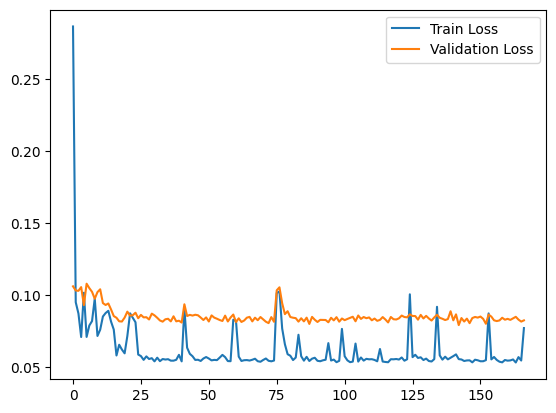

In [506]:
plt.plot(h.history['loss'],label='Train Loss')
plt.plot(h.history['val_loss'],label='Validation Loss')
plt.legend();

In [511]:
y_pred = model.evaluate(X_val,y_val)
y_pred

19/19 [==============================] - 0s 2ms/step - loss: 0.0989


0.09891144931316376

In [512]:
y_pred = model.predict(X_val)

19/19 [==============================] - 0s 2ms/step


In [513]:
y_pred = pd.DataFrame(y_pred, columns=y_val.columns)

In [514]:
error_list = pd.DataFrame()
for i in range(y_val.shape[0]):
    index = y_val.iloc[i].name
    indexes = list(returns.loc[index].dropna().index[:-2])
    ranking_real = np.argsort(np.argsort(-y_val.iloc[i][indexes]))
    ranking_pred = np.argsort(np.argsort(-y_pred.iloc[i][indexes]))

    ranking_real_ordenado = ranking_real.iloc[np.where(ranking_real<10)]
    ranking_pred_ordenado = ranking_pred.iloc[np.where(ranking_pred<10)]

    error = np.argsort(np.argsort(-ranking_real)) - np.argsort(np.argsort(-ranking_pred))
    error_top = error[ranking_pred_ordenado.index]
    error_list = pd.concat([error_list,error],axis=1)

In [516]:
error_list.columns = y_val.index

In [517]:
error_list

date,2021-05-10,2021-05-11,2021-05-12,2021-05-13,2021-05-14,2021-05-17,2021-05-18,2021-05-19,2021-05-20,2021-05-21,...,2023-07-28,2023-07-31,2023-08-01,2023-08-02,2023-08-03,2023-08-04,2023-08-07,2023-08-08,2023-08-09,2023-08-10
ACS,20.0,20.0,21.0,23.0,26.0,25.0,25.0,25.0,26.0,26.0,...,19.0,20.0,20.0,20.0,21.0,20.0,21.0,21.0,21.0,NaN
ACX_2,-23.0,-23.0,-22.0,-23.0,-23.0,-20.0,-19.0,-21.0,-21.0,-20.0,...,-10.0,-10.0,-9.0,-11.0,-10.0,-9.0,-9.0,-11.0,-9.0,NaN
AENA,1.0,1.0,0.0,-1.0,-1.0,0.0,-1.0,0.0,2.0,-1.0,...,-2.0,-4.0,-3.0,-4.0,-5.0,-4.0,-6.0,-3.0,-3.0,NaN
ALM,-28.0,-28.0,-26.0,-28.0,-27.0,-26.0,-26.0,-25.0,-25.0,-24.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AMS_1,18.0,17.0,17.0,16.0,15.0,14.0,14.0,13.0,15.0,10.0,...,18.0,18.0,17.0,17.0,18.0,18.0,17.0,19.0,23.0,NaN
ANA_2,-17.0,-16.0,-16.0,-15.0,-15.0,-13.0,-13.0,-15.0,-17.0,-17.0,...,-13.0,-13.0,-12.0,-13.0,-13.0,-13.0,-13.0,-13.0,-11.0,NaN
BBVA,7.0,5.0,9.0,8.0,9.0,9.0,4.0,7.0,6.0,1.0,...,-6.0,-6.0,-6.0,-5.0,-5.0,-4.0,-4.0,-4.0,1.0,NaN
BKT,25.0,27.0,26.0,28.0,28.0,29.0,29.0,29.0,32.0,28.0,...,3.0,3.0,4.0,23.0,10.0,9.0,22.0,19.0,19.0,NaN
CABK,-12.0,-12.0,-11.0,-14.0,-13.0,-10.0,-10.0,-12.0,-9.0,-11.0,...,-4.0,-3.0,-2.0,-3.0,-3.0,-2.0,-5.0,-6.0,-6.0,NaN
CIE,-9.0,-8.0,-8.0,-9.0,-13.0,-13.0,-13.0,-12.0,-9.0,-13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [518]:
error_list.mean(axis=1)[(error_list.mean(axis=1)<5) & (error_list.mean(axis=1)>-5)]

BBVA     4.381034
CABK    -4.901724
ELE_1    4.777586
GRF     -0.194828
IAG      0.960345
MTS     -0.944828
NTGY     4.368966
REE_1    1.641844
SAN_1    4.460345
RED      4.785235
ANE     -0.375427
dtype: float64

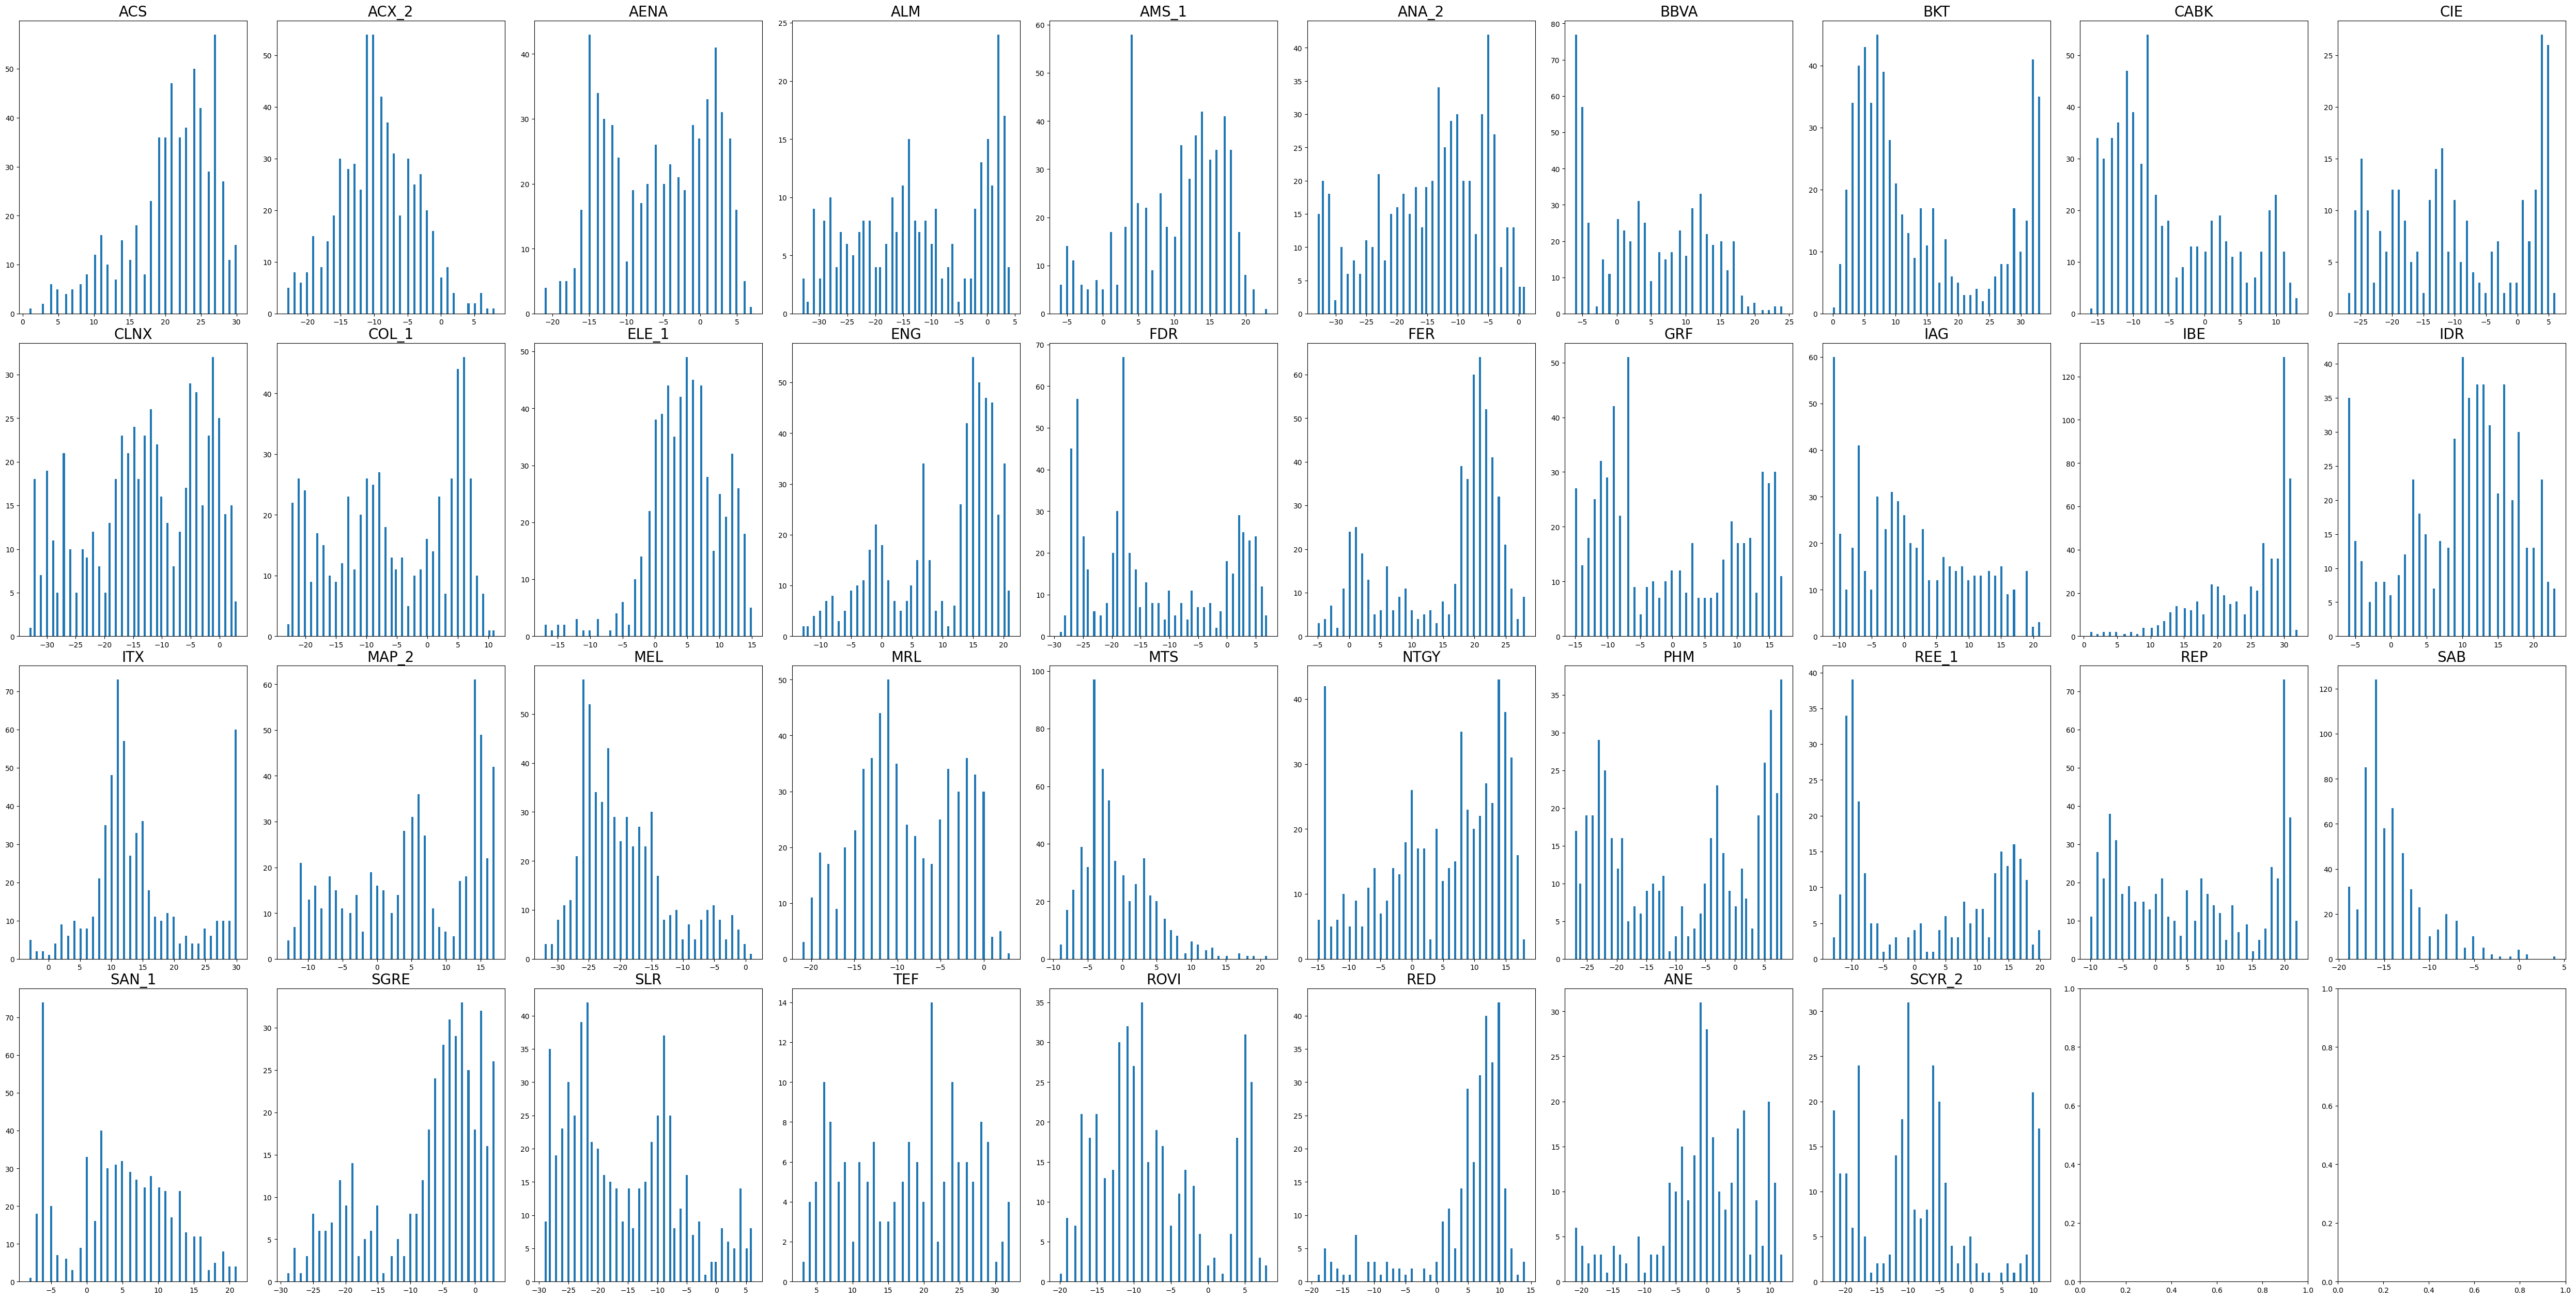

In [519]:
# GRAFICAMOS LOS RETORNOS DE TODOS LOS ACTIVOS
fig, axs = plt.subplots(nrows=math.ceil(len(error_list.index)/10), ncols=10, figsize=(50, 25))
fig.tight_layout(h_pad=2)
axs = axs.ravel()

for i in range(len(error_list.index)):

    axs[i].hist(error_list.loc[error_list.index[i]].dropna(),bins=100)
    axs[i].set_title(error_list.index[i],fontsize=20)

In [432]:
i = 100
index = y_val.iloc[i].name

In [433]:
indexes = list(returns.loc[index].dropna().index[:-2])

In [434]:
ranking_real = np.argsort(np.argsort(-y_val.iloc[i][indexes]))
ranking_pred = np.argsort(np.argsort(-y_pred.iloc[i][indexes]))

In [435]:
ranking_real_ordenado = ranking_real.iloc[np.where(ranking_real<10)].sort_values(ascending=True)
ranking_real_ordenado

GRF      0
TEF      1
PHM      2
ALM      3
SGRE     4
ELE_1    5
CIE      6
ENG      7
CABK     8
IBE      9
Name: 2021-11-08 00:00:00, dtype: int64

In [436]:
ranking_pred_ordenado = ranking_pred.iloc[np.where(ranking_pred<10)].sort_values(ascending=True)
ranking_pred_ordenado

AENA     0
ANA_2    1
MEL      2
SGRE     3
ALM      4
CLNX     5
ACX_2    6
SLR      7
FDR      8
CIE      9
Name: 100, dtype: int64

In [437]:
ranking_pred_ordenado,ranking_real_ordenado

(AENA     0
 ANA_2    1
 MEL      2
 SGRE     3
 ALM      4
 CLNX     5
 ACX_2    6
 SLR      7
 FDR      8
 CIE      9
 Name: 100, dtype: int64,
 GRF      0
 TEF      1
 PHM      2
 ALM      3
 SGRE     4
 ELE_1    5
 CIE      6
 ENG      7
 CABK     8
 IBE      9
 Name: 2021-11-08 00:00:00, dtype: int64)

In [438]:
error = np.argsort(np.argsort(-ranking_real)) - np.argsort(np.argsort(-ranking_pred))
error[(error >=-5) & (error <=5) & (error.index.isin(ranking_pred_ordenado.index))]

ALM     1
CIE     3
FDR    -5
SGRE   -1
dtype: int64

In [439]:
error[ranking_pred_ordenado.index]

AENA    -25
ANA_2   -32
MEL     -16
SGRE     -1
ALM       1
CLNX     -6
ACX_2   -20
SLR     -10
FDR      -5
CIE       3
dtype: int64